#### 교보문고 매장별 재고 및 위치 크롤링

- 해당 URL에서 매장 재고 위치가 떠 있지 않은 상태에서 크롤링을 하니 크롤링이 서울에서 광화문 94권등의 재고 및 위치 내용을 크롤링 할 수가 없었다. 따라서 selenium을 통해 크롤링을 해보았다.

In [218]:
from IPython.display import Image

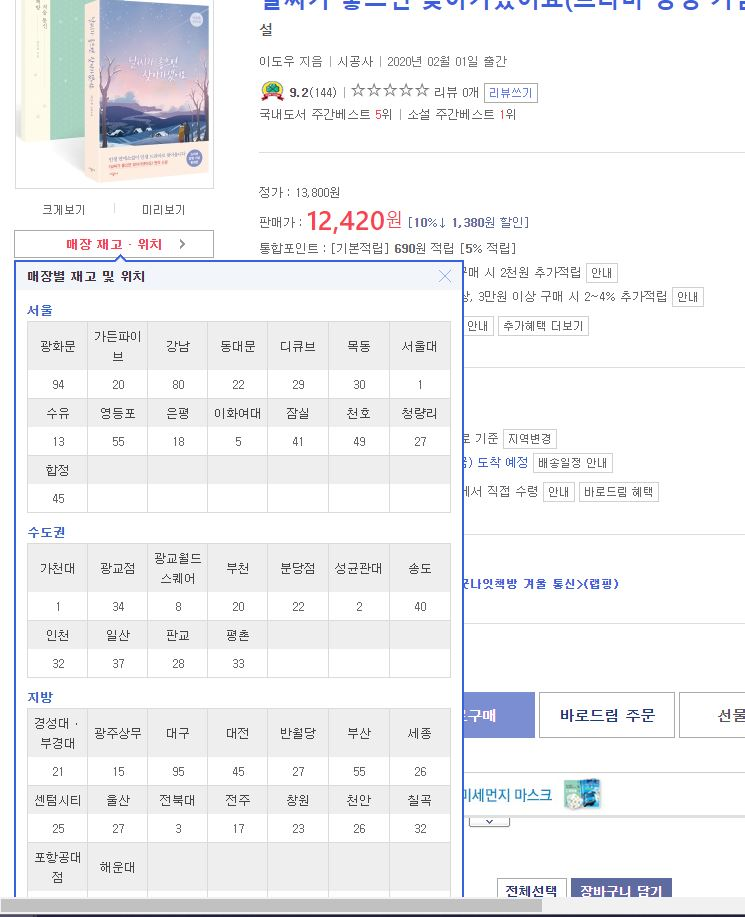

In [223]:
Image("./picture.jpg")

In [216]:
import requests
from selenium import webdriver
url = "http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&linkClass=01&barcode=9788952753946"
driver = webdriver.Chrome()
driver.get(url)
driver.find_element_by_css_selector("#btnStockOpen").click()


ls = []
for num in range(2,7,2):
    content = driver.find_elements_by_css_selector("#storeStockTable > table:nth-child({}) > tbody > tr > th".format(num))
    stock_count = driver.find_elements_by_css_selector("#storeStockTable > table:nth-child({}) > tbody > tr > td".format(num))
    for i in range(len(content)):
        if content[i].text != '':
            ls.append({"location" :content[i].text, "stock_count":stock_count[i].text})


driver.quit()
df = pd.DataFrame(ls)

In [225]:
df

,location,stock_count
0,광화문,89
1,가든파이브,26
2,강남,75
3,동대문,35
4,디큐브,29
5,목동,28
6,서울대,0
7,수유,10
8,영등포,54
9,은평,18
